In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

df = pd.read_csv('StudentPerformanceFactors.csv')

#### Câu 1: Khả năng tiếp cận tới nguồn lực và chất lượng giáo viên ảnh hưởng thế nào đến  việc học của học sinh.

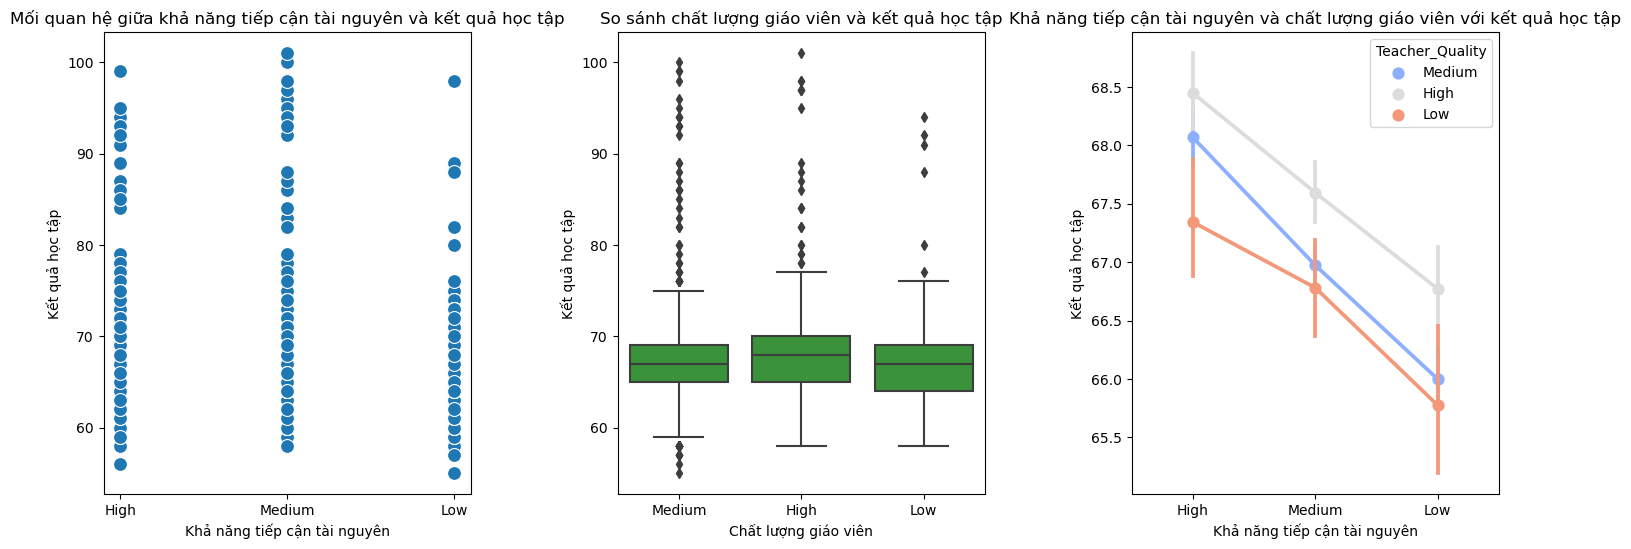

In [2]:
# Tạo một khung chứa ba biểu đồ
fig, axes = plt.subplots(1, 3, figsize=(18, 6), gridspec_kw={'wspace': 0.4})

# 1. Biểu đồ phân tán: Khả năng tiếp cận tài nguyên và kết quả học tập
sns.scatterplot(data=df, x='Access_to_Resources', y='Exam_Score', color='#1f77b4', s=100, ax=axes[0])
axes[0].set_title("Mối quan hệ giữa khả năng tiếp cận tài nguyên và kết quả học tập")
axes[0].set_xlabel("Khả năng tiếp cận tài nguyên")
axes[0].set_ylabel("Kết quả học tập")

# 2. Biểu đồ hộp: Chất lượng giáo viên và kết quả học tập
sns.boxplot(data=df, x='Teacher_Quality', y='Exam_Score', color='#2ca02c', ax=axes[1])
axes[1].set_title("So sánh chất lượng giáo viên và kết quả học tập")
axes[1].set_xlabel("Chất lượng giáo viên")
axes[1].set_ylabel("Kết quả học tập")

# 3. Biểu đồ điểm: Khả năng tiếp cận tài nguyên và chất lượng giáo viên đối với kết quả học tập
sns.pointplot(data=df, x="Access_to_Resources", y="Exam_Score", hue="Teacher_Quality", palette="coolwarm", ax=axes[2])
axes[2].set_title("Khả năng tiếp cận tài nguyên và chất lượng giáo viên với kết quả học tập")
axes[2].set_xlabel("Khả năng tiếp cận tài nguyên")
axes[2].set_ylabel("Kết quả học tập")

plt.show()

##### Kết luận: 
- Ở biểu đồ phân tán, ta thấy rằng học sinh có khả năng tiếp cận tài nguyên tốt hơn thường đạt điểm số cao hơn. Tuy nhiên, sự khác biệt không rõ ràng ở các nhóm với mức tiếp cận tài nguyên khác nhau
- Ở biểu đồ hộp, học sinh được giảng dạy vởi giáo viên có chất lượng tốt có xu hướng hướng đạt điểm cao hơn.
- Ở biểu đồ điểm cho thấy khả năng tiếp cận tài nguyên, chất lượng giáo viên tỉ lệ thuận với điểm số của học sinh. Học sinh có khả năng tiếp cận tài nguyên tốt hơn và giáo viên chất lượng cao thường đạt kết quả tốt nhất.

$\to$ Khả năng tiếp cận tài nguyên và chất lượng giáo viên đều có tác động đến kết quả học tập của học sinh. Tuy nhiên mức độ ảnh hưởng của từng yếu tố có thể thay đổi tùy thuộc vào mức độ hiện diện của yếu tố còn lại.

#### Câu 2: Mức độ động lực học tập có ảnh hưởng đến sự tiến bộ của học sinh không?

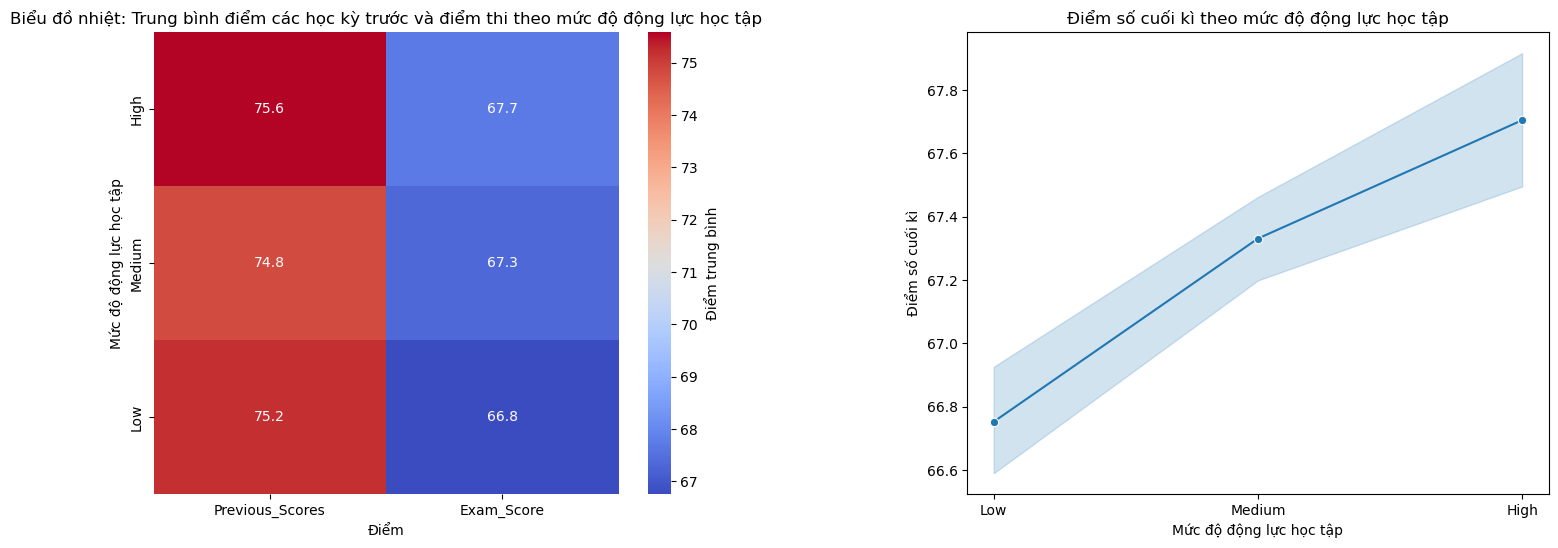

<Figure size 1000x600 with 0 Axes>

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6), gridspec_kw={'wspace': 0.4})

# 1. Biểu đồ heatmap: Điểm số trung bình các kỳ trước và điểm cuối kỳ theo mức độ động lực học tập
mean_scores = df.groupby('Motivation_Level').agg({
    'Previous_Scores': 'mean',
    'Exam_Score': 'mean'
}).reset_index()

# Đặt lại thứ tự hàng, chuyển "Low" xuống dưới cùng
mean_scores['Motivation_Level'] = pd.Categorical(mean_scores['Motivation_Level'],
                                                  categories=['High', 'Medium', 'Low'], 
                                                  ordered=True)

# Tạo ma trận cho heatmap
heatmap_data = mean_scores.set_index('Motivation_Level')

# Sắp xếp lại heatmap_data theo thứ tự mong muốn
heatmap_data = heatmap_data.reindex(['High', 'Medium', 'Low'])

# Vẽ biểu đồ nhiệt
plt.figure(figsize=(10, 6))
sns.heatmap(data=heatmap_data, annot=True, fmt=".1f", cmap="coolwarm", cbar_kws={'label': 'Điểm trung bình'}, ax=axes[0])
axes[0].set_title("Biểu đồ nhiệt: Trung bình điểm các học kỳ trước và điểm thi theo mức độ động lực học tập")
axes[0].set_xlabel("Điểm")
axes[0].set_ylabel("Mức độ động lực học tập")

# 2. Biểu đồ đường: Điểm số cuối kỳ theo mức độ động lực học tập
sns.lineplot(data=df, x='Motivation_Level', y='Exam_Score', marker='o', color='#1f77b4', ax=axes[1])
axes[1].set_title("Điểm số cuối kì theo mức độ động lực học tập")
axes[1].set_xlabel("Mức độ động lực học tập")
axes[1].set_ylabel("Điểm số cuối kì")

# Hiện biểu đồ
plt.show()

##### Kết luận:
- Ở biểu đồ thứ nhất cho thấy rằng điểm trung bình các học kì trước của học sinh khi có động lực học tập cao thì cũng có điểm số cao hơn một chút so với mức độ động lực học tập thấp hơn, nhưng nhìn chung không có sự chênh lệch rõ rệt giữa các mức độ động lực học tập. Ở phần điểm cuối kỳ so với động lực học tập, thì ta thấy điểm tăng nhẹ so với mức độ động lực học tập từ thấp đến cao.
- Ở biểu đồ thứ hai, biểu đồ đường cho ta thấy sự biến thiên rõ ràng hơn, học sinh có xu hướng điểm cao hơn một chút khi có động lực học tập cao hơn.

$\to$ Điểm số của học sinh sẽ có hướng cao hơn khi động lực học cao hơn.
